In [1]:
import sys
sys.path.insert(1, '../src')

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import titanic

In [2]:
df = pd.read_csv('../data/train.csv')
df.set_index('PassengerId', inplace=True)
df = titanic.sex_numeric(df)
df = titanic.name_preprocessing(df)
df = titanic.group_by_title(df)
df = titanic.has_family_onboard(df)
df = titanic.cabin_letter(df)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,Title,Name Vec,Title Group,Family Onboard,Cabin Letter
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,braund,mr,"[braund, mr, owen, harris]",3.0,1.0,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,cumings,mrs,"[cumings, mrs, john, bradley, florence, briggs...",1.0,1.0,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen,miss,"[heikkinen, miss, laina]",1.0,0.0,
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,futrelle,mrs,"[futrelle, mrs, jacques, heath, lily, may, peel]",1.0,1.0,C
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,allen,mr,"[allen, mr, william, henry]",3.0,0.0,


In [3]:
actual_y = np.array(df['Survived'])
actual_y[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [4]:
enc = OneHotEncoder(sparse=False).fit(X = df[['Embarked']].fillna(''))
col = enc.categories_[0]
print(col)

['' 'C' 'Q' 'S']


In [5]:
emb_df = pd.DataFrame(enc.transform(df[['Embarked']].fillna('')), columns = col, index=df.index)
emb_df.drop(columns = '', inplace=True)
for ea in emb_df.columns:
    emb_df.rename(columns={ea:'emb_' + ea}, inplace=True)
emb_df.head()

,emb_C,emb_Q,emb_S
PassengerId,,,
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0


In [6]:
enc = OneHotEncoder(sparse=False).fit(X = df[['Cabin Letter']])
col = enc.categories_[0]
print(col)

['' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']


In [7]:
cabin_df = pd.DataFrame(enc.transform(df[['Cabin Letter']]), columns = col, index=df.index)
cabin_df.drop(columns = '', inplace=True)
for ea in cabin_df.columns:
    cabin_df.rename(columns={ea:'cabin_' + ea}, inplace=True)
cabin_df.head()

,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T
PassengerId,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
reg_x = df[['Pclass','Title Group', 'Family Onboard']].join(emb_df, how='left')
reg_x = reg_x.join(cabin_df, how='left')
reg_x.head()

,Pclass,Title Group,Family Onboard,emb_C,emb_Q,emb_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T
PassengerId,,,,,,,,,,,,,,
1,3,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,3,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
fit_cols = list(reg_x.columns)
fit_cols

['Pclass',
 'Title Group',
 'Family Onboard',
 'emb_C',
 'emb_Q',
 'emb_S',
 'cabin_A',
 'cabin_B',
 'cabin_C',
 'cabin_D',
 'cabin_E',
 'cabin_F',
 'cabin_G',
 'cabin_T']

In [10]:
model = LogisticRegression().fit(reg_x, actual_y)
print('R2 Score: %.2f' % model.score(reg_x, actual_y))
print('coefficients:', model.coef_)

R2 Score: 0.82
coefficients: [[-0.85061954 -1.46259127 -0.37398783  0.28928746 -0.05790062 -0.34856269
  -0.11629975  0.35955935 -0.01770905  0.87348333  1.09481257  0.64233971
   0.00897624 -0.24815109]]


In [11]:
pred_y = model.predict(reg_x)
print(classification_report(actual_y,pred_y))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       549
           1       0.80      0.73      0.76       342

    accuracy                           0.82       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



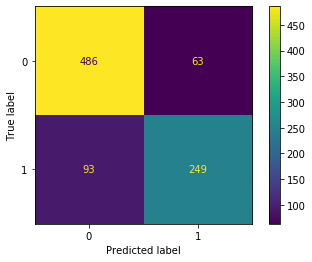

In [12]:
cm = confusion_matrix(actual_y,pred_y)
cm_display = ConfusionMatrixDisplay(cm, [0, 1]).plot(values_format='d')

In [13]:
df = pd.read_csv('../data/test.csv')
df.set_index('PassengerId', inplace=True)
df = titanic.sex_numeric(df)
df = titanic.name_preprocessing(df)
df = titanic.group_by_title(df)
df = titanic.has_family_onboard(df)
df = titanic.cabin_letter(df)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,Title,Name Vec,Title Group,Family Onboard,Cabin Letter
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,kelly,mr,"[kelly, mr, james]",3.0,0.0,
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,wilkes,mrs,"[wilkes, mrs, james, ellen, needs]",1.0,1.0,
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,myles,mr,"[myles, mr, thomas, francis]",3.0,0.0,
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,wirz,mr,"[wirz, mr, albert]",3.0,0.0,
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,hirvonen,mrs,"[hirvonen, mrs, alexander, helga, e, lindqvist]",1.0,1.0,


In [14]:
enc = OneHotEncoder(sparse=False).fit(X = df[['Embarked']].fillna(''))
col = enc.categories_[0]
emb_df = pd.DataFrame(enc.transform(df[['Embarked']].fillna('')), columns = col, index=df.index)
try:
    emb_df.drop(columns = '', inplace=True)
except KeyError:
    pass
for ea in emb_df.columns:
    emb_df.rename(columns={ea:'emb_' + ea}, inplace=True)
emb_df.head()

,emb_C,emb_Q,emb_S
PassengerId,,,
892,0.0,1.0,0.0
893,0.0,0.0,1.0
894,0.0,1.0,0.0
895,0.0,0.0,1.0
896,0.0,0.0,1.0


In [15]:
enc = OneHotEncoder(sparse=False).fit(X = df[['Cabin Letter']])
col = enc.categories_[0]
cabin_df = pd.DataFrame(enc.transform(df[['Cabin Letter']]), columns = col, index=df.index)
try:
    cabin_df.drop(columns = '', inplace=True)
except KeyError:
    pass
for ea in cabin_df.columns:
    cabin_df.rename(columns={ea:'cabin_' + ea}, inplace=True)
cabin_df.head()

,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G
PassengerId,,,,,,,
892,0.0,0.0,0.0,0.0,0.0,0.0,0.0
893,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894,0.0,0.0,0.0,0.0,0.0,0.0,0.0
895,0.0,0.0,0.0,0.0,0.0,0.0,0.0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
reg_x = df[['Pclass','Title Group', 'Family Onboard']].join(emb_df, how='left')
reg_x = reg_x.join(cabin_df, how='left')
for ea in fit_cols:
    if ea not in reg_x.columns:
        reg_x[ea] = 0
    
reg_x = reg_x[fit_cols]
reg_x.head()

,Pclass,Title Group,Family Onboard,emb_C,emb_Q,emb_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T
PassengerId,,,,,,,,,,,,,,
892,3,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
893,3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
894,2,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
895,3,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
896,3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
pred_y = model.predict(reg_x)
pred_y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [18]:
answer = pd.DataFrame(pred_y, index = df.index, columns = ['Survived'])
answer.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [19]:
answer.to_csv('../data/results.csv')